In [3]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: magrittr

Attaching package: ‘forecast’

The following object is masked from ‘package:ggpubr’:

    gghistogram

Loading required package: foreach
Loading required package: iterators
Loading required package: parallel


In [4]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

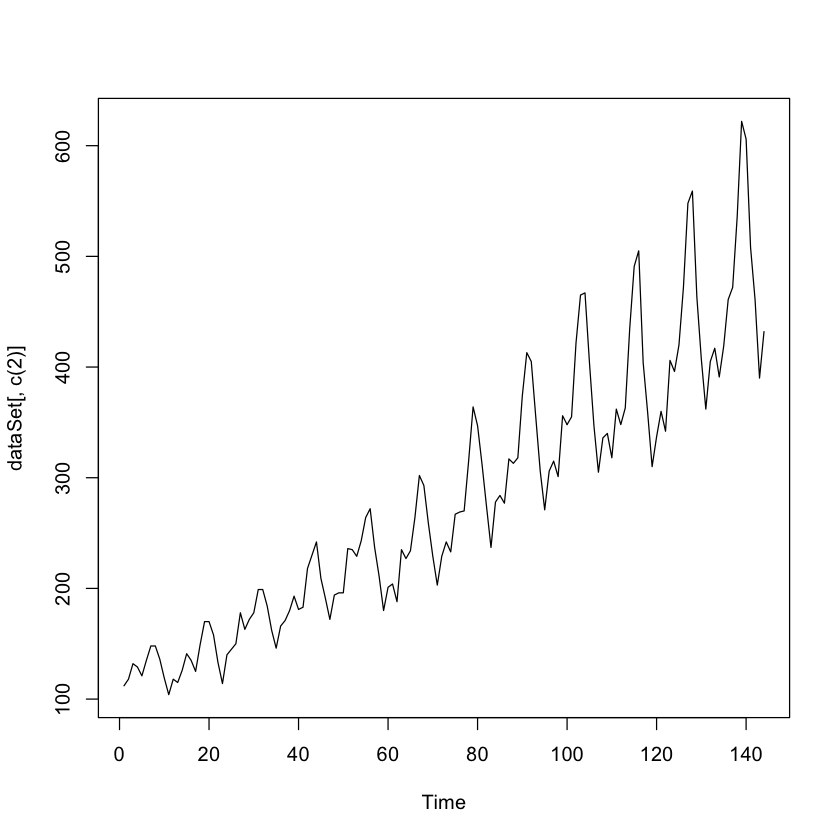

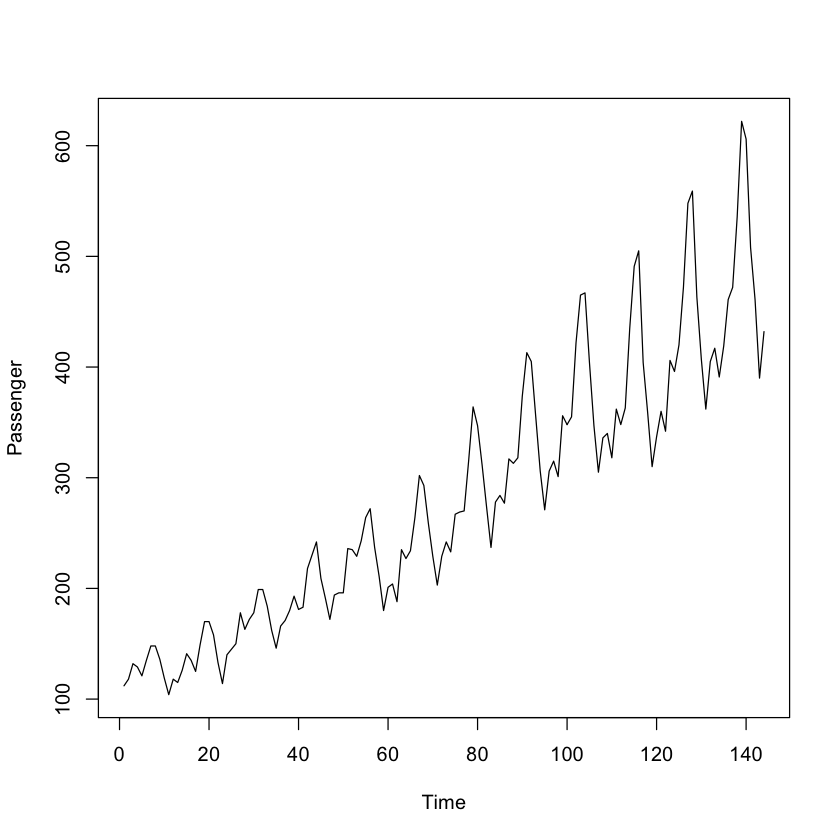

In [5]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [6]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

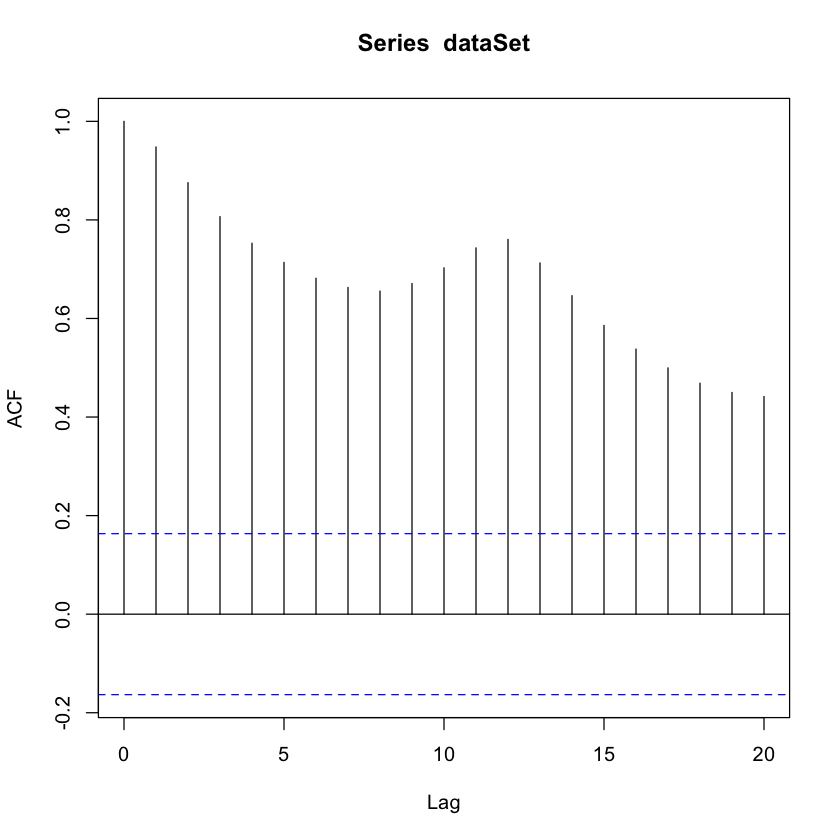

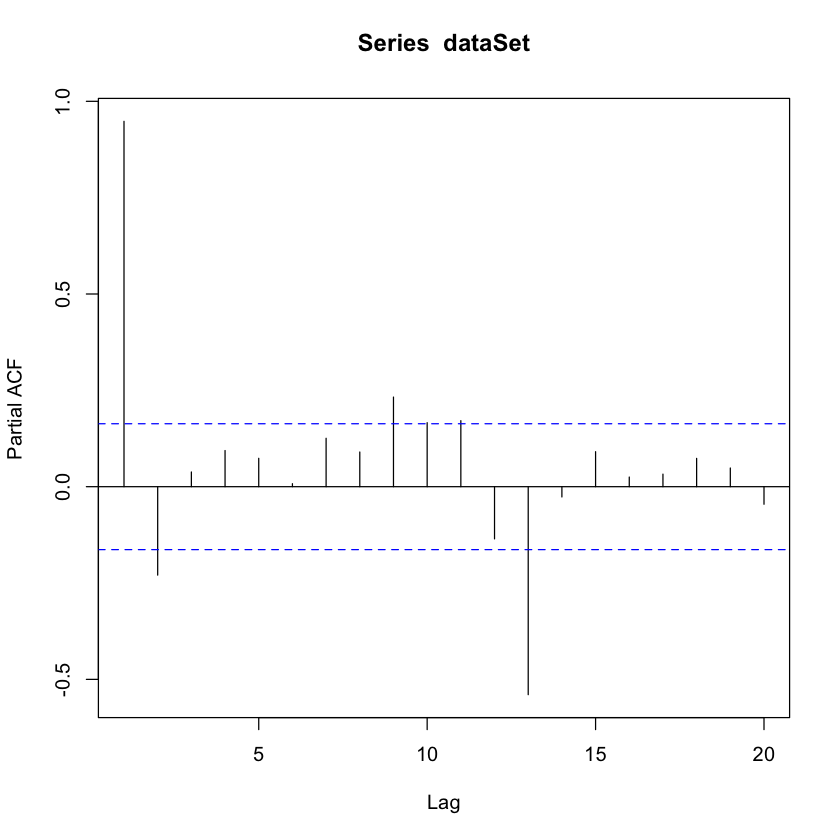

In [7]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  

Series: dataSet 
ARIMA(4,1,2) with drift 

Coefficients:
         ar1     ar2      ar3      ar4      ma1      ma2   drift
      0.2243  0.3689  -0.2567  -0.2391  -0.0971  -0.8519  2.6809
s.e.  0.1047  0.1147   0.0985   0.0919   0.0866   0.0877  0.1711

sigma^2 estimated as 706.3:  log likelihood=-670.07
AIC=1356.15   AICc=1357.22   BIC=1379.85


	Ljung-Box test

data:  Residuals from ARIMA(4,1,2)
Q* = 14.495, df = 4, p-value = 0.005873

Model df: 6.   Total lags used: 10

[1] 0.9487879


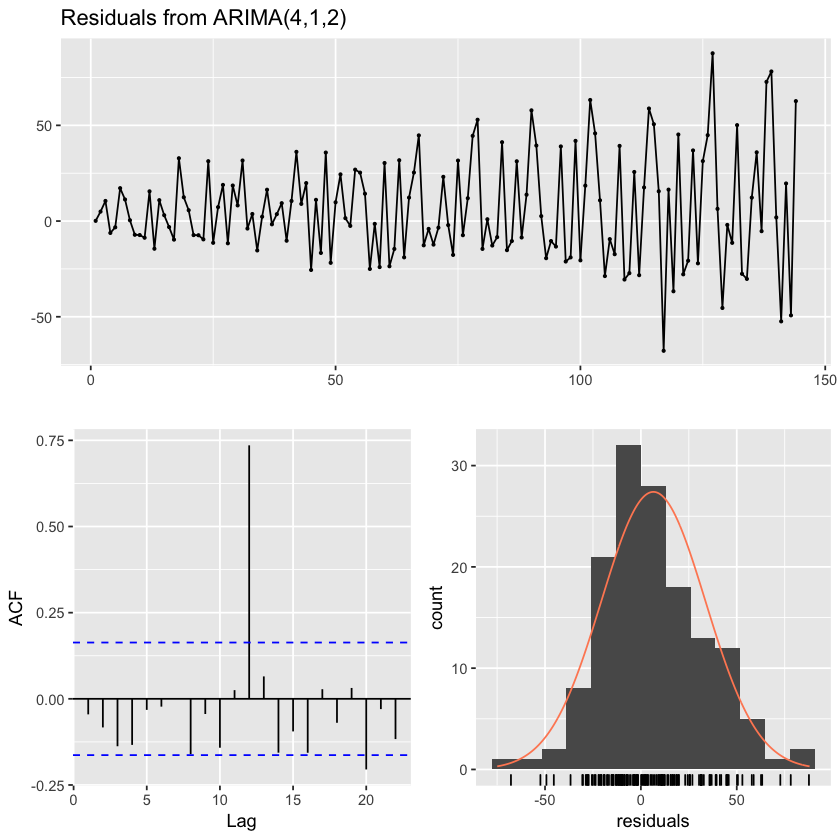

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       487.9627 452.1733 523.7520 433.2276 542.6977
146       498.3183 440.3708 556.2659 409.6952 586.9415
147       525.8846 458.1642 593.6049 422.3152 629.4539
148       511.8703 438.8027 584.9379 400.1231 623.6175
149       503.8562 429.8645 577.8480 390.6957 617.0168
150       487.9487 413.7023 562.1952 374.3986 601.4989
151       479.1737 404.8406 553.5067 365.4911 592.8563
152       476.7804 402.1433 551.4174 362.6329 590.9279
153       478.9047 403.4093 554.4000 363.4445 594.3648
154       484.2235 407.1934 561.2536 366.4161 602.0309
155       488.6339 409.6286 567.6391 367.8058 609.4620
156       491.4535 410.5159 572.3911 367.6701 615.2369
157       491.8124 409.2345 574.3903 365.5204 618.1044
158       490.6101 406.7350 574.4852 362.3341 618.8860
159       488.8031 403.8631 573.7430 358.8986 618.7075
160       487.2815 401.3775 573.1855 355.9026 618.6604
161       486.5406 399.6669 573.4142 353.6788 619.4023
162       

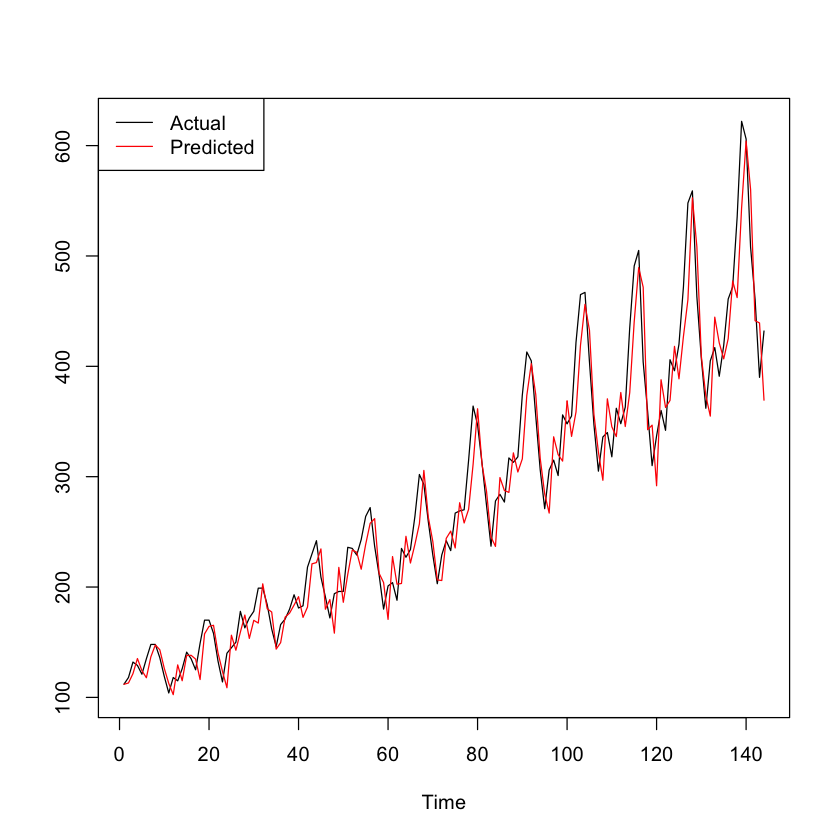

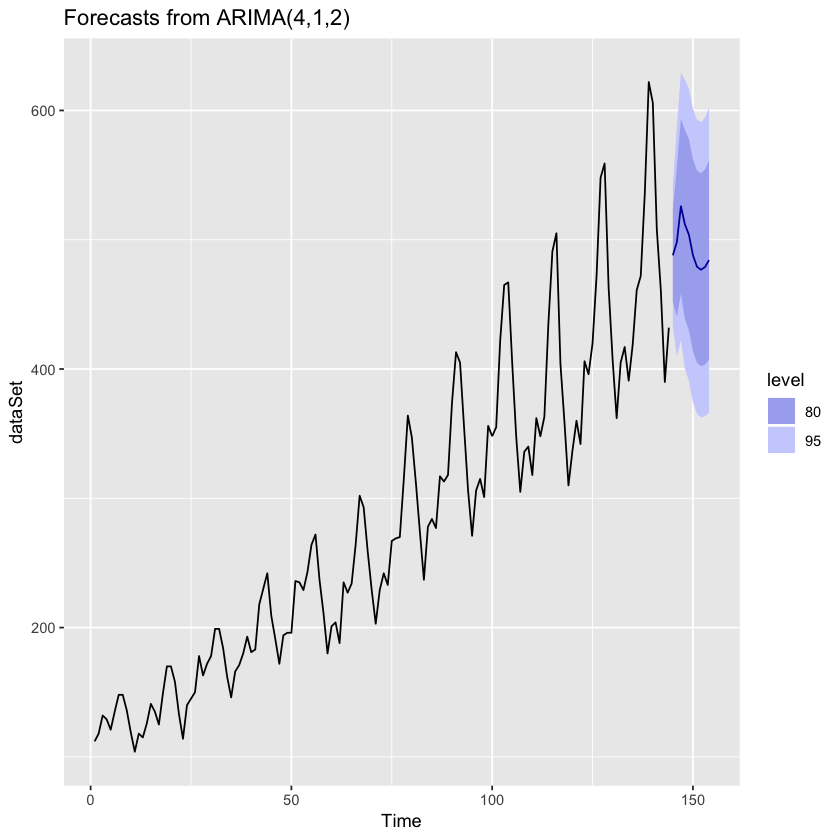

In [8]:
# Find an appropiate ARIMA model using auto.arima(dataset)
auto.arima(dataSet)

# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(4,1,2)); checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))